In [2]:
import scipy.io
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

In [3]:
bat = scipy.io.loadmat('Synthetic_LiPo_PulseDischarge.mat')

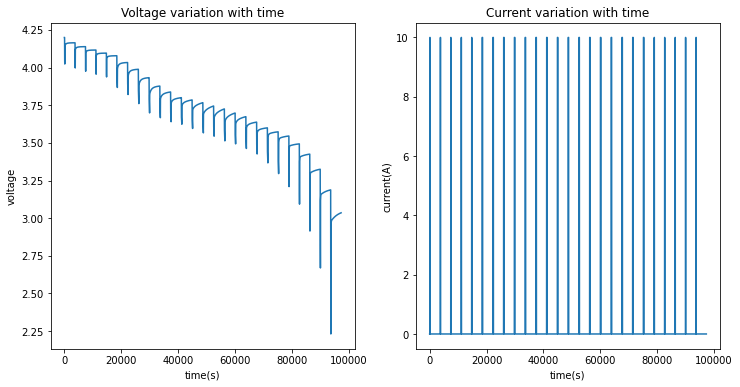

In [4]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(bat['time'][:], bat['voltage'][:])
plt.title("Voltage variation with time")
plt.xlabel("time(s)")
plt.ylabel("voltage")

plt.subplot(1,2,2)
plt.plot(bat['time'][:], bat['current'][:])
plt.title("Current variation with time")
plt.xlabel("time(s)")
plt.ylabel("current(A)")
plt.savefig("Current_Discharge_pulse.png")

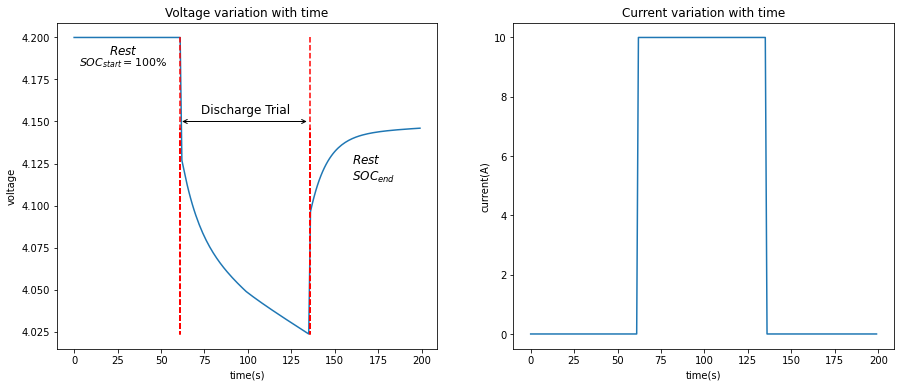

In [5]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(bat['time'][0:200], bat['voltage'][0:200])
plt.plot(61*np.ones(200), bat['voltage'][0:200], '--r')
plt.plot(136*np.ones(200), bat['voltage'][0:200], '--r')
plt.title("Voltage variation with time")
plt.xlabel("time(s)")
plt.ylabel("voltage")
plt.text(20, 4.19, '$Rest$', fontsize = 12)
plt.text(3, 4.183, '$SOC_{start} = 100\% $', fontsize = 11)
plt.text(160, 4.125, r'${Rest}$', fontsize = 12)
plt.text(160, 4.115, '$SOC_{end}$', fontsize = 12)
plt.annotate('', xy=(61,4.15), xytext=(135,4.15), arrowprops=dict(arrowstyle='<->'))
plt.text(73, 4.155, 'Discharge Trial', fontsize = 12)


plt.subplot(1, 2, 2)
plt.plot(bat['time'][0:200], bat['current'][0:200])
plt.title("Current variation with time")
plt.xlabel("time(s)")
plt.ylabel("current(A)")
plt.savefig("1_discharge_pulse.png")

Text(0, 0.5, 'Voltage(V)')

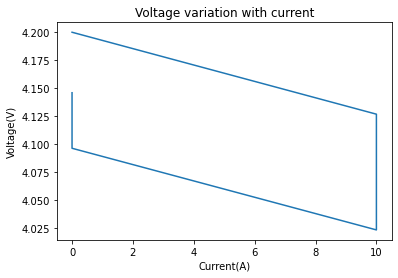

In [6]:
plt.plot(bat['current'][0:200], bat['voltage'][0:200],)
plt.title("Voltage variation with current")
plt.xlabel("Current(A)")
plt.ylabel("Voltage(V)")

In [13]:
voltage = bat['voltage'][61 : 1500]
current = bat['current'][61:1500]
time = bat['time'][61:1500]

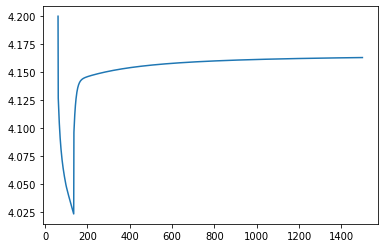

In [14]:
plt.plot(time, voltage)

In [16]:
rng = np.random.RandomState(1)
training_indices = rng.choice(np.squeeze(time) - 61, size=30, replace=False)
time_train, voltage_train = time[training_indices], voltage[training_indices]

In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [19]:
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(time_train, voltage_train)
gaussian_process.kernel_

/home/aman/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RBF(length_scale=75.7)

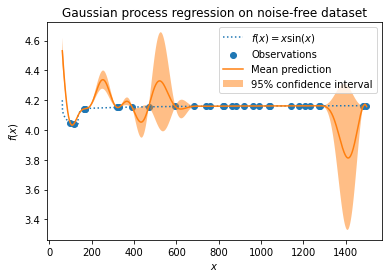

In [20]:
mean_prediction, std_prediction = gaussian_process.predict(time, return_std=True)

plt.plot(time, voltage, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(time_train, voltage_train, label="Observations")
plt.plot(time, mean_prediction, label="Mean prediction")
plt.fill_between(
    time.ravel(),
    mean_prediction.ravel() - 1.96 * std_prediction.ravel(),
    mean_prediction.ravel() + 1.96 * std_prediction.ravel(),
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

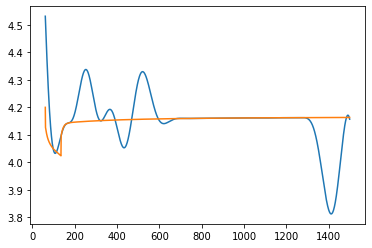

In [22]:
plt.plot(time, mean_prediction)
plt.plot(time, voltage)